In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox

In [12]:
manatees = pd.read_csv ("C:/Users/igles/Documents/Data Science/Untitled Folder/manatees.csv")
print(manatees)

    PowerBoats  ManateeDeaths
0          436             14
1          449             21
2          470             18
3          487             19
4          502             24
5          501             18
6          515             20
7          548             27
8          575             30
9          604             34
10         635             31
11         665             49
12         701             51
13         709             43
14         671             50
15         669             43
16         668             32
17         686             49
18         703             41
19         722             56
20         745             52
21         799             57
22         820             84
23         869             92
24         932             69
25         952             97
26         969             75
27         974             71
28        1001             71
29        1015             92
30        1018             76
31        1001             79
32        

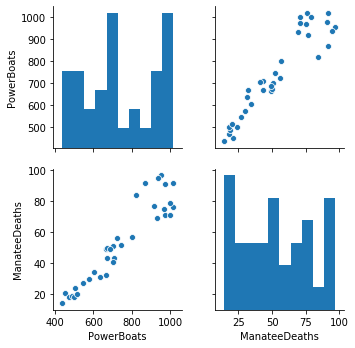

In [14]:
sns.pairplot(manatees)

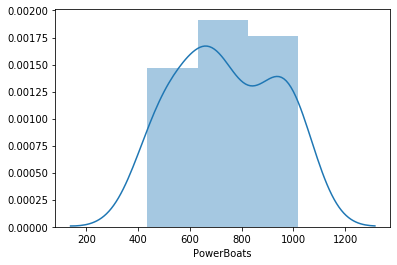

In [16]:
sns.distplot(manatees['PowerBoats'])

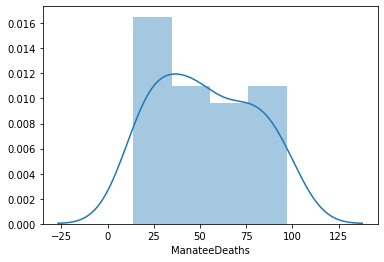

In [17]:
sns.distplot(manatees['ManateeDeaths'])

In [18]:
x = manatees['PowerBoats']
y = manatees['ManateeDeaths']
model = sm.OLS(y,x).fit()

In [19]:
pred_val = model.fittedvalues.copy()
true_val = manatees['ManateeDeaths'].values.copy()
residual = true_val - pred_val

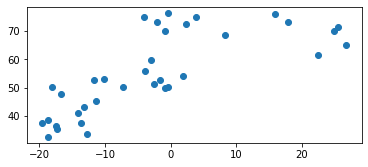

In [20]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

In [21]:
sms.diagnostic.het_breuschpagan(residual, manatees[['PowerBoats']])

(14.786518579352652, nan, 24.871600356010788, 1.7849503580150847e-05)

In [22]:
sms.linear_harvey_collier(model)


Ttest_1sampResult(statistic=5.479252885631467, pvalue=5.433881942347164e-06)

(array([3., 4., 2., 2., 6., 4., 2., 1., 3., 8.]),
 array([ 62.82865603,  67.12466574,  71.42067544,  75.71668514,
         80.01269484,  84.30870454,  88.60471424,  92.90072394,
         97.19673364, 101.49274334, 105.78875305]),
 <a list of 10 Patch objects>)

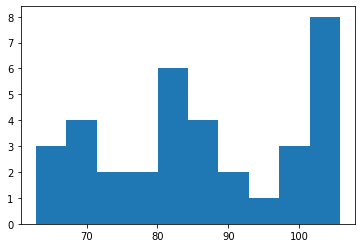

In [25]:
transformed, _ = boxcox(manatees['PowerBoats'])
plt.hist(transformed)

In [26]:
x = transformed
model1 = sm.OLS(y,x).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          ManateeDeaths   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                              328.1
Date:                Mon, 14 Oct 2019   Prob (F-statistic):                    4.88e-19
Time:                        22:07:31   Log-Likelihood:                         -150.84
No. Observations:                  35   AIC:                                      303.7
Df Residuals:                      34   BIC:                                      305.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6411      0.035     18.113      0.000       0.569       0.713
==============================================================================
Omnibus:                        3.678   Durbin-Watson:                   0.455
Prob(Omnibus):                  0.159   Jarque-Bera (JB):                2.425
Skew:                           0.454   Prob(JB):                        0.297
Kurtosis:                       2.085   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
pred_val = model1.fittedvalues.copy()
true_val = manatees['ManateeDeaths'].values.copy()
residual = true_val - pred_val

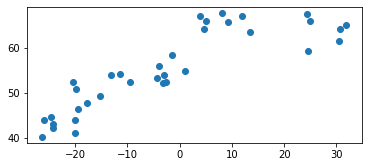

In [30]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

In [31]:
manatees.corr()

PowerBoats  ManateeDeaths
PowerBoats       1.000000       0.937637
ManateeDeaths    0.937637       1.000000

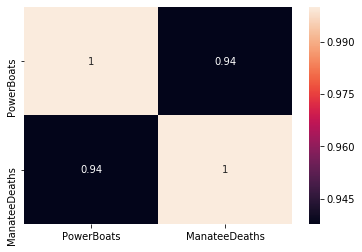

In [33]:
sns.heatmap(manatees.corr(), annot =True)

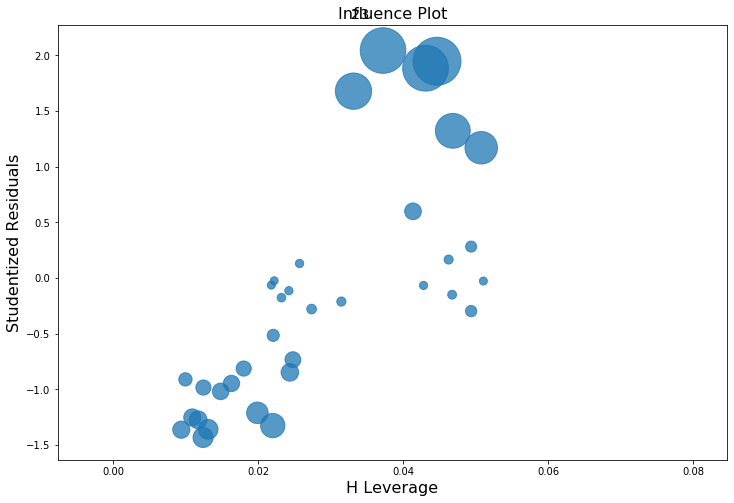

In [34]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, alpha = .05, ax = ax, criterion="cooks")

In [35]:
infl = model.get_influence()
print(infl.summary_frame())

    dfb_PowerBoats   cooks_d  standard_resid  hat_diag  dffits_internal  \
0        -0.132313  0.017079       -1.344190  0.009364        -0.130685   
1        -0.091052  0.008333       -0.911488  0.009930        -0.091285   
2        -0.131236  0.016941       -1.240967  0.010881        -0.130158   
3        -0.138372  0.018804       -1.261270  0.011682        -0.137128   
4        -0.110133  0.012142       -0.982851  0.012413        -0.110190   
5        -0.160086  0.024862       -1.409258  0.012364        -0.157676   
6        -0.156233  0.023818       -1.341372  0.013064        -0.154330   
7        -0.124618  0.015514       -1.016502  0.014792        -0.124555   
8        -0.121656  0.014847       -0.946983  0.016286        -0.121846   
9        -0.109841  0.012187       -0.816096  0.017970        -0.110396   
10       -0.172217  0.029260       -1.201621  0.019862        -0.171055   
11       -0.009384  0.000091       -0.063826  0.021783        -0.009524   
12       -0.017788  0.000

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          ManateeDeaths   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                              584.4
Date:                Mon, 14 Oct 2019   Prob (F-statistic):                    5.35e-23
Time:                        22:13:00   Log-Likelihood:                         -141.48
No. Observations:                  35   AIC:                                      285.0
Df Residuals:                      34   BIC:                                      286.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PowerBoats     0.0750      0.003     24.174      0.000       0.069       0.081
==============================================================================
Omnibus:                        4.022   Durbin-Watson:                   0.782
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                3.676
Skew:                           0.775   Prob(JB):                        0.159
Kurtosis:                       2.660   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""